In [1]:
%pwd

u'/home/t.cri.ksilliman/OA_RNA'

In [5]:
%%sh
module load java-jdk/1.8.0_92
module load fastqc/0.11.5

fastqc -o /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/ --extract /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/*.fastq.gz -t 8

Analysis complete for CG-AG_S3_L006_R1_001.fastq.gz
Analysis complete for CG-AG_S3_L006_R2_001.fastq.gz
Analysis complete for CG-AA_S4_L006_R1_001.fastq.gz
Analysis complete for CG-AA_S4_L006_R2_001.fastq.gz
Analysis complete for CG-AM_S1_L006_R1_001.fastq.gz
Analysis complete for CG-AC_S2_L006_R1_001.fastq.gz
Analysis complete for CG-AM_S1_L006_R2_001.fastq.gz
Analysis complete for CG-AC_S2_L006_R2_001.fastq.gz
Analysis complete for CG-BA_S8_L006_R1_001.fastq.gz
Analysis complete for CG-BA_S8_L006_R2_001.fastq.gz
Analysis complete for CG-BC_S6_L006_R1_001.fastq.gz
Analysis complete for CG-BG_S7_L006_R1_001.fastq.gz
Analysis complete for CG-BG_S7_L006_R2_001.fastq.gz
Analysis complete for CG-BM_S5_L006_R2_001.fastq.gz
Analysis complete for CG-BM_S5_L006_R1_001.fastq.gz
Analysis complete for CG-BC_S6_L006_R2_001.fastq.gz


Started analysis of CG-AA_S4_L006_R1_001.fastq.gz
Started analysis of CG-AA_S4_L006_R2_001.fastq.gz
Started analysis of CG-AC_S2_L006_R1_001.fastq.gz
Started analysis of CG-AC_S2_L006_R2_001.fastq.gz
Started analysis of CG-AG_S3_L006_R1_001.fastq.gz
Started analysis of CG-AG_S3_L006_R2_001.fastq.gz
Started analysis of CG-AM_S1_L006_R1_001.fastq.gz
Started analysis of CG-AM_S1_L006_R2_001.fastq.gz
Approx 5% complete for CG-AG_S3_L006_R1_001.fastq.gz
Approx 5% complete for CG-AA_S4_L006_R1_001.fastq.gz
Approx 5% complete for CG-AG_S3_L006_R2_001.fastq.gz
Approx 5% complete for CG-AA_S4_L006_R2_001.fastq.gz
Approx 5% complete for CG-AC_S2_L006_R1_001.fastq.gz
Approx 5% complete for CG-AM_S1_L006_R2_001.fastq.gz
Approx 5% complete for CG-AC_S2_L006_R2_001.fastq.gz
Approx 5% complete for CG-AM_S1_L006_R1_001.fastq.gz
Approx 10% complete for CG-AG_S3_L006_R1_001.fastq.gz
Approx 10% complete for CG-AG_S3_L006_R2_001.fastq.gz
Approx 10% complete for CG-AA_S4_L006_R1_001.fastq.gz
Approx 10% com

In [7]:
%%sh
multiqc /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output -o /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output

Searching 320 files..


[INFO   ]         multiqc : This is MultiQC v1.4
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching '/scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output'
[INFO   ]          fastqc : Found 16 reports
[INFO   ]         multiqc : Compressing plot data
[INFO   ]         multiqc : Report      : ../../../scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/multiqc_report.html
[INFO   ]         multiqc : Data        : ../../../scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/multiqc_data
[INFO   ]         multiqc : MultiQC complete



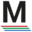
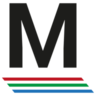
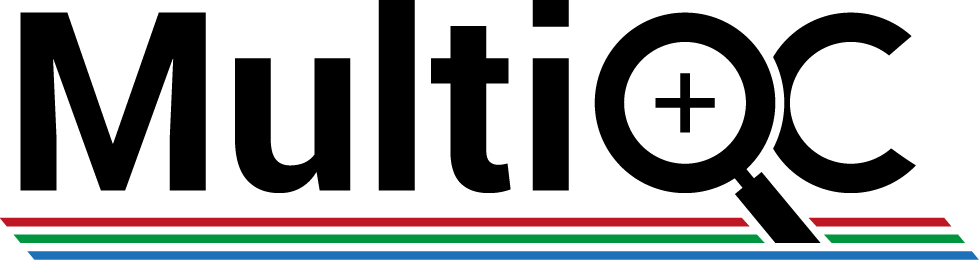
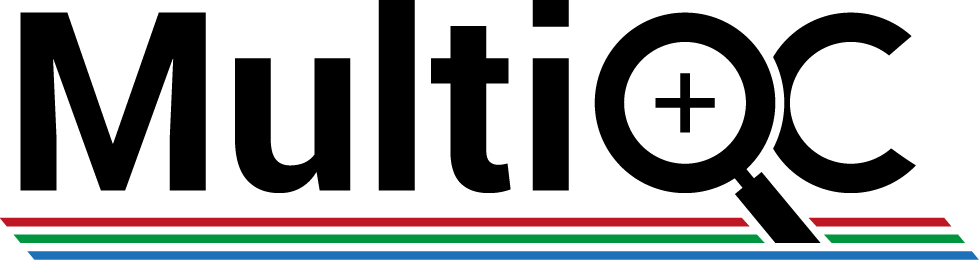
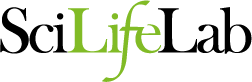

In [10]:
from IPython.core.display import display, HTML
display(HTML('/scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/multiqc_report.html'))


In [1]:
%%sh
module load gcc/6.2.0
module load jellyfish/2.2.3
module load zlib/1.2.8


perl ~/Downloads/rcorrector/run_rcorrector.pl -t 8 -1 /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/CG-AA_S4_L006_R1_001.fastq.gz -2 /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/CG-AA_S4_L006_R2_001.fastq.gz -od /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/
R1=`ls -m /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/*R1*.fastq.gz | tr -d '\n'`
R2=`ls -m /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/*R2*.fastq.gz | tr -d '\n'`

perl ~/Downloads/rcorrector/run_rcorrector.pl -t 8 -1 $R1 -2 $R2 -od /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output

Put the kmers into bloom filter
jellyfish bc -m 23 -s 100000000 -C -t 8 -o tmp_d6af26b1926b4e0f5c758a8213f5f388.bc <(gzip -cd /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/CG-AA_S4_L006_R1_001.fastq.gz) <(gzip -cd /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/CG-AA_S4_L006_R2_001.fastq.gz) 
Count the kmers in the bloom filter
jellyfish count -m 23 -s 100000 -C -t 8 --bc tmp_d6af26b1926b4e0f5c758a8213f5f388.bc -o tmp_d6af26b1926b4e0f5c758a8213f5f388.mer_counts <(gzip -cd /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/CG-AA_S4_L006_R1_001.fastq.gz) <(gzip -cd /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/CG-AA_S4_L006_R2_001.fastq.gz) 
Dump the kmers
jellyfish dump -L 2 tmp_d6af26b1926b4e0f5c758a8213f5f388.mer_counts > tmp_d6af26b1926b4e0f5c758a8213f5f388.jf_dump
Error correction
/home/t.cri.ksilliman/Downloads/rcorrector/rcorrector -t 8 -od /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/  -p /scratch/t.cri.ksilliman/OA_RNA/Scallop/Sc

In [ ]:
%%sh
module load gcc/6.2.0
module load jellyfish/2.2.3
module load zlib/1.2.8

cd /scratch/t.cri.ksilliman/OA_RNA/

for i in /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/*R1*.fastq.gz;
    do perl ~/Downloads/rcorrector/run_rcorrector.pl -t 10 -1 $i -2 ${i/R1/R2} -od /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/;
done;

In [9]:
%%sh

ls /scratch/t.cri.ksilliman/OA_RNA/Scallop/Scallop_Raw_RNASeq/*.gz | wc -l
ls /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/*cor* | wc -l

16
16


In [1]:
%%sh

for s in /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/*R1*cor*;
    do python FilterUncorrectabledPEfastq.py --left_reads $s --right_reads ${s/R1/R2} --out_prefix /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/fixed;
done;

100000 reads processed
200000 reads processed
300000 reads processed
400000 reads processed
500000 reads processed
600000 reads processed
700000 reads processed
800000 reads processed
900000 reads processed
1000000 reads processed
1100000 reads processed
1200000 reads processed
1300000 reads processed
1400000 reads processed
1500000 reads processed
1600000 reads processed
1700000 reads processed
1800000 reads processed
1900000 reads processed
2000000 reads processed
2100000 reads processed
2200000 reads processed
2300000 reads processed
2400000 reads processed
2500000 reads processed
2600000 reads processed
2700000 reads processed
2800000 reads processed
2900000 reads processed
3000000 reads processed
3100000 reads processed
3200000 reads processed
3300000 reads processed
3400000 reads processed
3500000 reads processed
3600000 reads processed
3700000 reads processed
3800000 reads processed
3900000 reads processed
4000000 reads processed
4100000 reads processed
4200000 reads processed
4

In [2]:
%%sh
mkdir /scratch/t.cri.ksilliman/OA_RNA/Scallop/trimmed_reads

for s in /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/fixed*R1*;
    do /home/t.cri.ksilliman/TrimGalore-0.4.5/trim_galore --paired --retain_unpaired --phred33 --output_dir /scratch/t.cri.ksilliman/OA_RNA/Scallop/trimmed_reads --length 36 -q 5 --stringency 1 -e 0.1 $s ${s/R1/R2};
done;

1.15
1.15
1.15
1.15
1.15
1.15
1.15
1.15


Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/fixed_CG-AA_S4_L006_R1_001.cor.fq <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Illumina	1885	AGATCGGAAGAGC	1000000	0.19
Nextera	2	CTGTCTCTTATA	1000000	0.00
smallRNA	1	TGGAATTCTCGG	1000000	0.00
Using Illumina adapter for trimming (count: 1885). Second best hit was Nextera (count: 2)

Writing report to '/scratch/t.cri.ksilliman/OA_RNA/Scallop/trimmed_reads/fixed_CG-AA_S4_L006_R1_001.cor.fq_trimming_report.txt'

SUMMARISING RUN PARAMETERS
Input filename: /scratch/t.cri.ksilliman/OA_RNA/Scallop/QC_Output/fixed_CG-AA_S4_L006_R1_001.cor.fq
Trimming mode: paired-end
Trim Galore version: 0.4.4_dev
Cutadapt version: 1.15
Quality P